# IN269 Kecerdasan Bisnis
## Pertemuan 12: Clustering

## Supervised Learning
<center>
    <img src="images/supervised-learning.png" width="1000"/>
</center>

## Unsupervised Learning
<center>
    <img src="images/unsupervised-learning.png" width="1000"/>
</center>

- In unsupervised learning data points have no labels associated with them.
- Instead, the goal of an unsupervised learning is to <u>organize the data in some way or to describe its structure</u>.
- This can also mean grouping it into clusters or finding different ways of looking at complex data so that it appears simpler or more organized. 

- **Clustering**: Division of a set of observations into subsets (clusters) where items in the same cluster are similar.
- **Type of learning**: It is a method of unsupervised learning.
- **Use**: Common in statistical data analysis across many fields.
- **Scope**: Clustering is only one part of unsupervised learning, not the only method.

- We will look at two types of clustering algorithms: **agglomerative** (going bottom to top) and **divisive** (going top to bottom).
- In addition, we will also discuss a very important technique, called **expectation maximization** (EM), which is used in situations where we have too many unknowns and not enough guidance on how to explain or fit the data using a model.

- Divisive clustering is the reverse of agglomerative clustering.
- It works in a top-down manner by splitting one large cluster into smaller clusters.

**General steps**:
1. Start with all objects in a single cluster.
2. Repeat until all clusters are singletons:     
     - Select a cluster to split based on a criterion.
     - Replace it with subclusters.
     
**Challenges include**:
- Deciding how many clusters to split into.
- Determining how to perform the split.

<center>
    <img src="images/divisive-clustering.png" width="1000"/>
</center>    

<center>
    <img src="images/first-steps.png" width="1000"/>
</center>    

<center>
    <img src="images/plot-a-b.png" width="1000"/>
</center>    

<center>
    <img src="images/penjelasan-7-3.png" width="1000"/>
</center>    

<center>
    <img src="images/table-7-4.png" width="1000"/>
</center>    

<center>
    <img src="images/table-7-6.png" width="1000"/>
</center>    

<center>
    <img src="images/tiy-7-1.png" width="1000"/>
</center>    

## Divisive Clustering with $k$-Means
- A key challenge in clustering is deciding the number of clusters.
- $k$-means provides a simple and effective solution for divisive clustering.
- $k$-means allows experimentation with different values of $k$ (number of clusters).
- It is one of the most frequently used clustering algorithms.
- $k$-means groups objects into $k$ clusters based on attributes or features, where $k$ is a positive integer.

**Goal**: Group data by minimizing the sum of squared distances between points and their cluster centroid.    


**Steps in $k$-means clustering**:

1. **Choose k**: Decide the number of clusters (can experiment with different values).
2. **Initial partition**:
     - Start with an initial classification into k clusters (randomly or systematically).
     - Example:
         - Take the first k samples as single-element clusters.
         - Assign remaining (n − k) samples to the nearest centroid, updating centroids after each assignment.
3. **Iterative reassignment**:
     - For each sample, compute distance to all centroids.
     - If a sample is not in the closest cluster, move it to that cluster.
     - Update centroids of both the gaining and losing clusters.

<center>
    <img src="images/k-means-andrew-ng.png" width="1000"/>
</center>    
<b>Referensi</b>: CS229 Lecture Notes - Andrew Ng, Tengyu Ma

## Hands-on Example: $k$-Means Clustering
Let's start by importing various packages:

In [2]:
import os
os.environ['OMP_NUM_THREADS'] = '1'
# Import libraries needed
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

We will now generate some random data. Let's create 200 data points on 2D surface that are randomly distributed in six groups:

In [3]:
# Create 2D data with 6 clusters
data = make_blobs(n_samples=200, n_features=2, centers=6, cluster_std=3)

- In that data variable we are holding 200 data points that were randomly generated with x and y coordinates with six different origins. That is the ground truth, but in real-life situations we do not get to know such information about the origin of the data. 
- Instead, we are simply given those 200 data points and asked if we could organize them in some way.
- We will now go ahead with clustering the data points into six clusters. Of course, it may seem like we are cheating here, but this example will help us illustrate how the $k$-means process works $\Rightarrow$ from initial random assignment of clusters to the final, converged clustering. 
- For this, we will write a loop that takes us through many iterations of k-means and examine (visualize) how the clustering looks at various stages. 

The following code will accomplish that:

c:\Users\Hp\.conda\envs\kec-bis\Lib\site-packages\threadpoolctl.py:1226: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


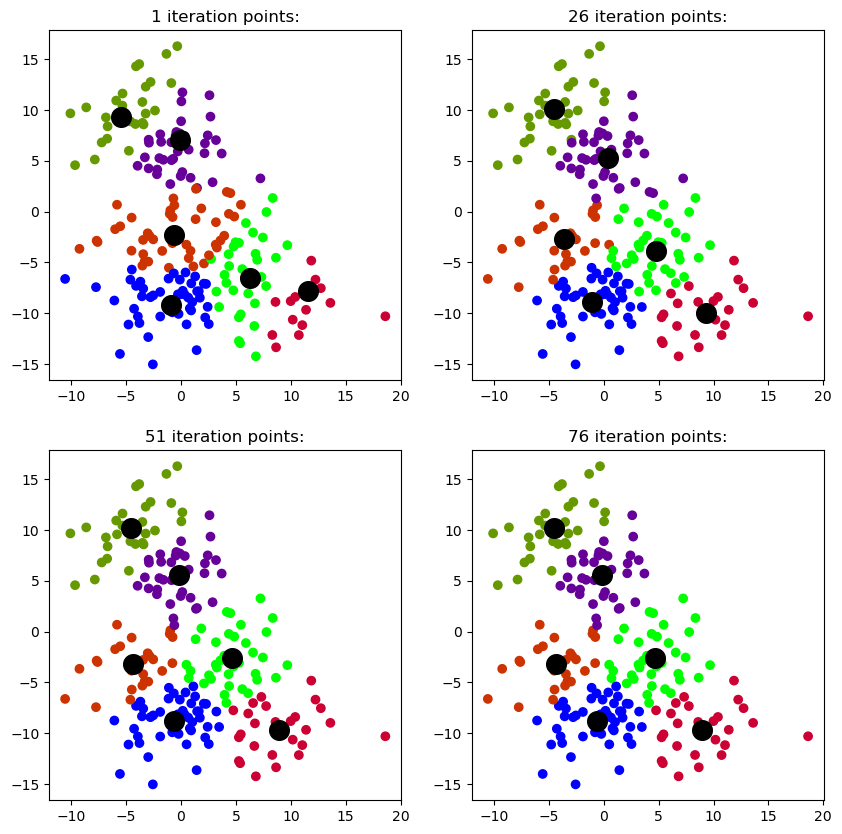

In [4]:
c=d=0
fig, ax = plt.subplots(2, 2, figsize=(10,10))

for i in range(4):
    ax[c,d].plot(c,d)
    ax[c,d].title.set_text(f"{i * 25 + 1} iteration points:")
    
    # Build a model with fix random_state
    kmeans = KMeans(n_clusters=6,max_iter=i * 5 + 1, random_state=4)
    
    # Predict the clusters
    kmeans.fit(data[0])
    centroids=kmeans.cluster_centers_

    # Plot the clusters
    ax[c,d].scatter(data[0][:,0],data[0][:,1],c=kmeans.labels_,cmap='brg')
    ax[c,d].scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black')

    d+=1
    if d==2:
        c+=1
        d=0


- As we can see, at iteration 1, $k$-means starts out by randomly placing the six cluster centers (centroids), but as the process continues those centroids shift, and so do the cluster assignments for many of the data points. 
- In the end we have achieved clustering that roughly corresponds to the original data.
- Of course, in a real application we are most likely not going to know the ground truth (how many clusters, which point belongs to which cluster). 

- If we treat the given example like that, we should experiment with different numbers of clusters and examine which number for $k$ makes sense. 
- In this example we have the luxury of having a visual representation of our data and clustering. 
- That allows us to qualitatively make a decision about how many clusters may be appropriate. 
- But what if we cannot visualize the data? There are several methods for doing a quantitative assessment for that. One of them is called the “elbow method.”

## Latihan Clustering with Iris Dataset

1. Load the **Iris dataset**.
2. Extract the **first two features**.
3. Apply **$k$-means clustering**.
4. Decide how many clusters are appropriate.
    - (Optional) Plot the data first to see its scatter.
5. Show the **plot with clusters marked**.
6. If you have also done classification with this data:
    - Reflect on the dataset and techniques used.
    - Write your thoughts in **1–2 paragraphs**.

### Jawab

In [5]:
# Step 1: Load the Iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

iris = datasets.load_iris()
print("Dataset loaded successfully!")
print(f"Feature names: {iris.feature_names}")
print(f"Data shape: {iris.data.shape}")
print(f"Target classes: {iris.target_names}")

Dataset loaded successfully!
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Data shape: (150, 4)
Target classes: ['setosa' 'versicolor' 'virginica']


In [6]:
# Step 2: Extract the first two features (Sepal Length & Sepal Width)
X = iris.data[:, :2]
print(f"Using features: {iris.feature_names[:2]}")
print(f"Extracted data shape: {X.shape}")

Using features: ['sepal length (cm)', 'sepal width (cm)']
Extracted data shape: (150, 2)


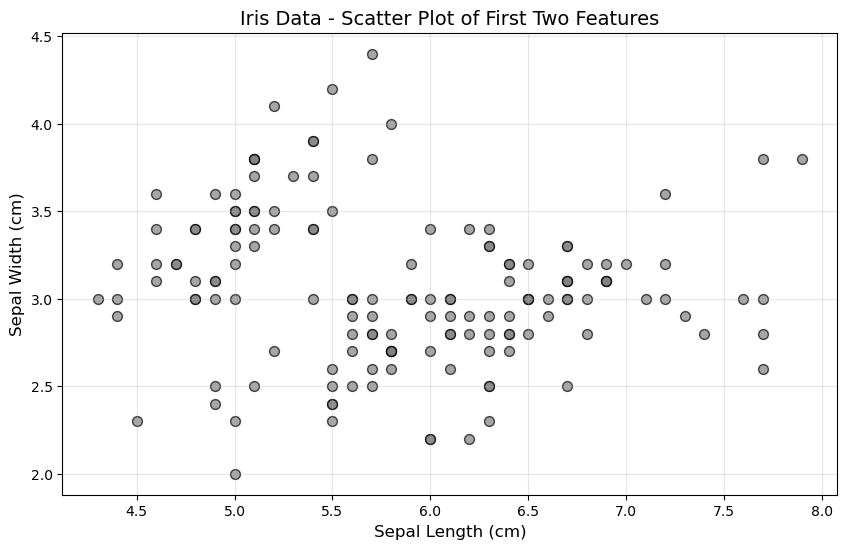

In [7]:
# Step 4 (Optional): Plot the data first to see its scatter
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolor='k', s=50, alpha=0.7)
plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.title('Iris Data - Scatter Plot of First Two Features', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

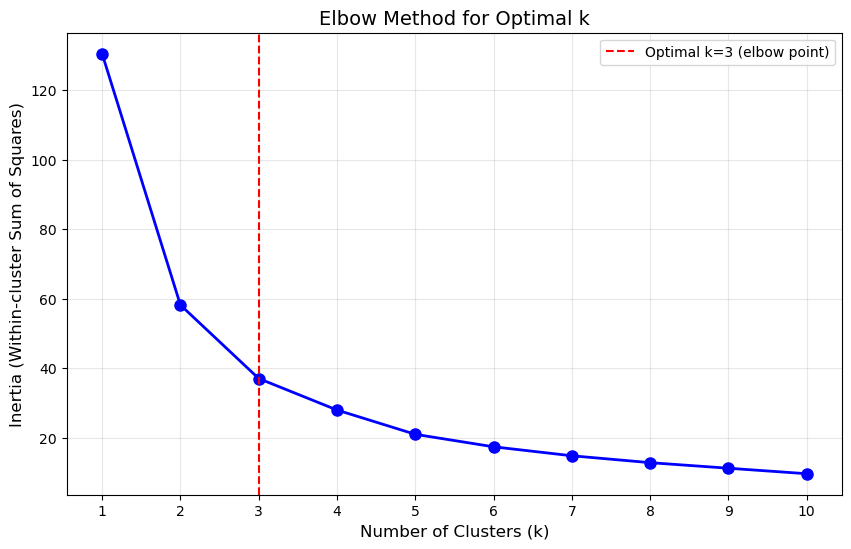

Berdasarkan Elbow Method, k=3 adalah pilihan yang tepat karena:
- Setelah k=3, penurunan inertia menjadi lebih lambat (elbow point)
- Iris dataset memiliki 3 spesies, sehingga 3 cluster masuk akal


In [8]:
# Step 4: Determine optimal number of clusters using Elbow Method
inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Plot the Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)', fontsize=12)
plt.ylabel('Inertia (Within-cluster Sum of Squares)', fontsize=12)
plt.title('Elbow Method for Optimal k', fontsize=14)
plt.xticks(K_range)
plt.grid(True, alpha=0.3)
plt.axvline(x=3, color='red', linestyle='--', label='Optimal k=3 (elbow point)')
plt.legend()
plt.show()

print("Berdasarkan Elbow Method, k=3 adalah pilihan yang tepat karena:")
print("- Setelah k=3, penurunan inertia menjadi lebih lambat (elbow point)")
print("- Iris dataset memiliki 3 spesies, sehingga 3 cluster masuk akal")

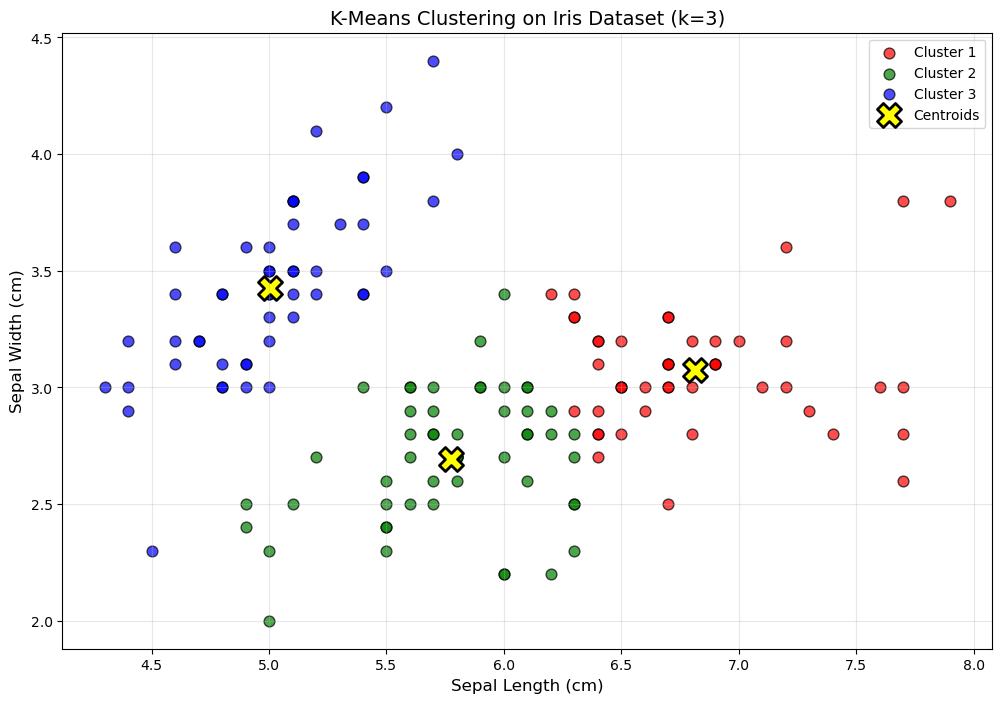


Cluster Centers:
  Cluster 1: Sepal Length = 6.81, Sepal Width = 3.07
  Cluster 2: Sepal Length = 5.77, Sepal Width = 2.69
  Cluster 3: Sepal Length = 5.01, Sepal Width = 3.43

Total data points per cluster:
  Cluster 1: 47 samples
  Cluster 2: 53 samples
  Cluster 3: 50 samples


In [9]:
# Step 3 & 5: Apply K-Means Clustering with k=3 and show plot with clusters marked
k = 3
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# Create the plot with clusters marked
plt.figure(figsize=(12, 8))
colors = ['red', 'green', 'blue']
cluster_names = ['Cluster 1', 'Cluster 2', 'Cluster 3']

for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                c=colors[i], label=cluster_names[i], 
                s=60, edgecolor='k', alpha=0.7)

# Plot centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', marker='X', edgecolor='black', linewidths=2,
            label='Centroids')

plt.xlabel('Sepal Length (cm)', fontsize=12)
plt.ylabel('Sepal Width (cm)', fontsize=12)
plt.title('K-Means Clustering on Iris Dataset (k=3)', fontsize=14)
plt.legend(loc='upper right', fontsize=10)
plt.grid(True, alpha=0.3)
plt.show()

# Print cluster information
print(f"\nCluster Centers:")
for i, center in enumerate(kmeans.cluster_centers_):
    print(f"  Cluster {i+1}: Sepal Length = {center[0]:.2f}, Sepal Width = {center[1]:.2f}")
print(f"\nTotal data points per cluster:")
for i in range(k):
    print(f"  Cluster {i+1}: {sum(y_kmeans == i)} samples")

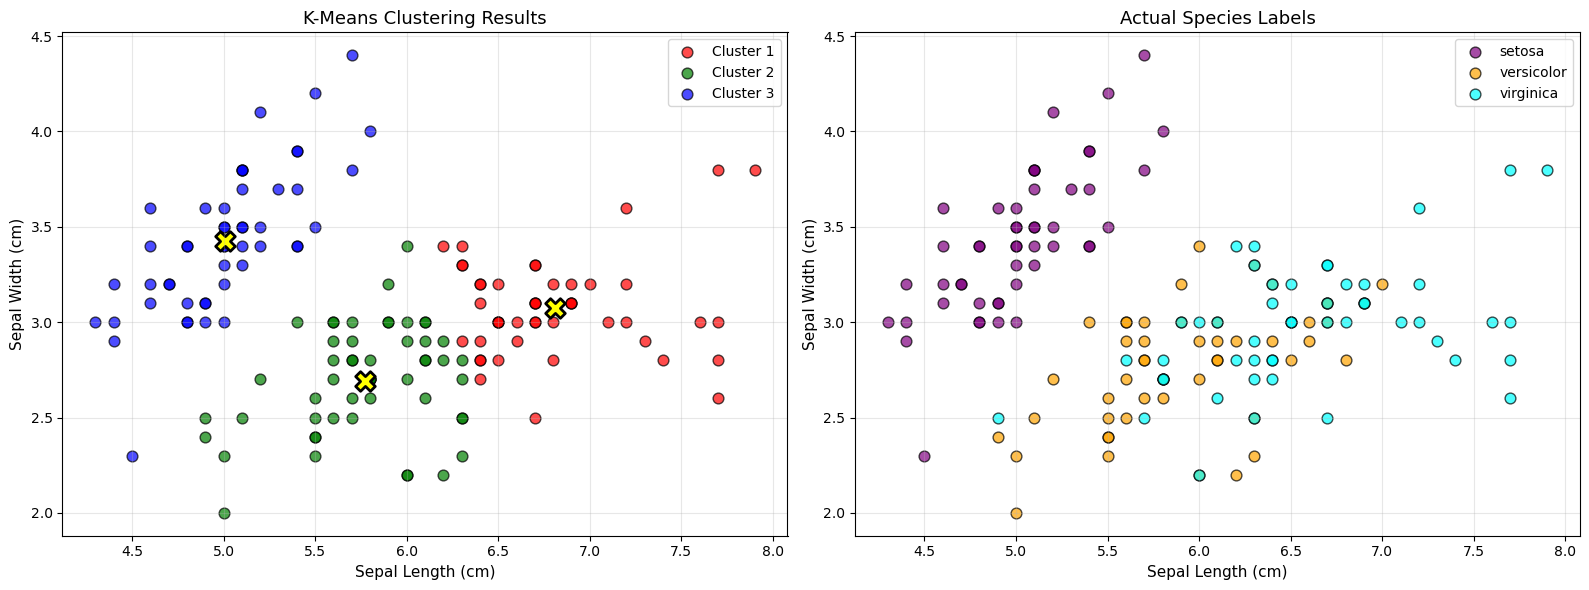

In [10]:
# Bonus: Compare clustering results with actual labels
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: K-Means Clustering Results
ax1 = axes[0]
for i in range(k):
    ax1.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                c=colors[i], label=f'Cluster {i+1}', s=60, edgecolor='k', alpha=0.7)
ax1.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='X', edgecolor='black', linewidths=2)
ax1.set_xlabel('Sepal Length (cm)', fontsize=11)
ax1.set_ylabel('Sepal Width (cm)', fontsize=11)
ax1.set_title('K-Means Clustering Results', fontsize=13)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Actual Species Labels
ax2 = axes[1]
species_colors = ['purple', 'orange', 'cyan']
for i, species in enumerate(iris.target_names):
    mask = iris.target == i
    ax2.scatter(X[mask, 0], X[mask, 1], 
                c=species_colors[i], label=species, s=60, edgecolor='k', alpha=0.7)
ax2.set_xlabel('Sepal Length (cm)', fontsize=11)
ax2.set_ylabel('Sepal Width (cm)', fontsize=11)
ax2.set_title('Actual Species Labels', fontsize=13)
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### Step 6: Refleksi - Clustering vs Classification pada Iris Dataset

**Perbandingan Teknik:**
Clustering seperti $k$-means adalah teknik *unsupervised learning* yang mengelompokkan data berdasarkan kemiripan fitur tanpa mengetahui label aslinya. Pada Iris dataset, meskipun hanya menggunakan dua fitur pertama (sepal length dan sepal width), $k$-means berhasil memisahkan data menjadi tiga kelompok yang cukup sesuai dengan tiga spesies aslinya (setosa, versicolor, virginica). Hal ini menunjukkan bahwa fitur-fitur tersebut sudah cukup informatif untuk membedakan kelompok utama dalam data. Namun, hasil clustering tidak selalu identik dengan label asli karena algoritma tidak memiliki akses ke informasi label saat proses pengelompokan.

**Keunggulan dan Penggunaan:**
Sebaliknya, teknik classification (*supervised learning*) menggunakan label asli untuk melatih model sehingga mampu memprediksi spesies dengan akurasi yang lebih tinggi. Meskipun classification biasanya memberikan performa lebih baik karena memanfaatkan informasi label, clustering tetap sangat berguna untuk eksplorasi awal data, menemukan pola tersembunyi, atau ketika label tidak tersedia. Kombinasi kedua teknik ini dapat memberikan pemahaman yang lebih komprehensif tentang struktur data dan membantu mengevaluasi kualitas fitur yang digunakan. Dalam kasus Iris, hasil clustering yang mirip dengan label asli menunjukkan bahwa struktur data sudah cukup jelas untuk dipisahkan bahkan tanpa supervisi.

## Divisive Clustering with $k$-Modes
- $k$-means is surely one of the most popular and easy-to-understand techniques for doing clustering. 
- But it is based on an important assumption that the variables or features being considered are numerical. 
- But what if they are categorical? 
- We can use a similar algorithm, called $k$-modes, which <u>uses mode instead of mean to calculate its centroids</u>. 
- We do not need to rewrite the $k$-means algorithm to indicate that change. 
- Instead, let’s go ahead and do a hands-on example where clustering is done with categorical variables.

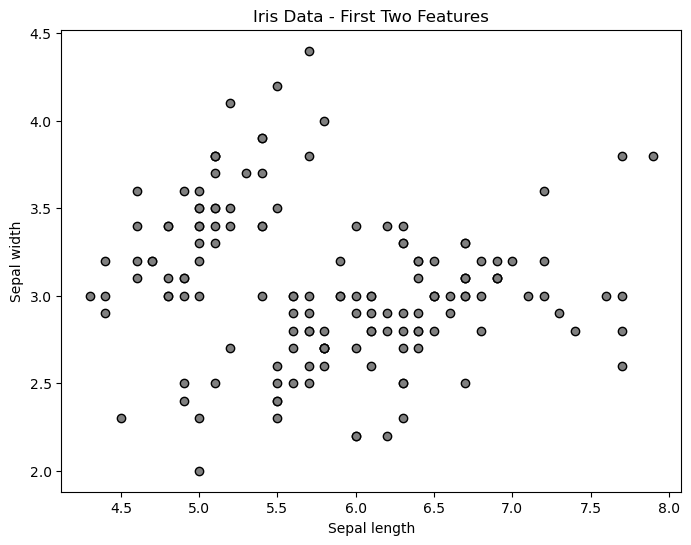

In [11]:
# 1. Load the Iris dataset
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, :2]  # 2. Extract the first two features

# 4. (Optional) Plot the data to see its scatter
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c='gray', edgecolor='k')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('Iris Data - First Two Features')
plt.show()

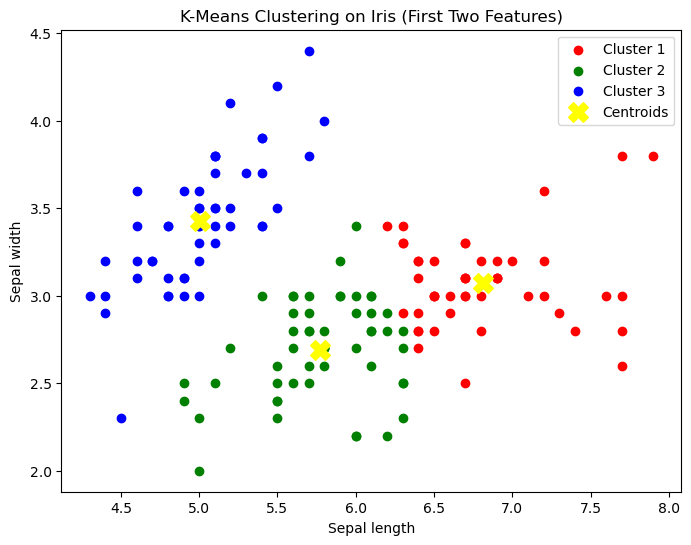

In [12]:
# 3. Apply k-means clustering (try k=3, as there are 3 species in Iris)
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# 5. Show the plot with clusters marked
plt.figure(figsize=(8, 6))
colors = ['red', 'green', 'blue']
for i in range(k):
    plt.scatter(X[y_kmeans == i, 0], X[y_kmeans == i, 1], 
                color=colors[i], label=f'Cluster {i+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='yellow', marker='X', label='Centroids')
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.title('K-Means Clustering on Iris (First Two Features)')
plt.legend()
plt.show()

### Refleksi: Clustering vs Classification pada Iris Dataset

Clustering seperti $k$-means adalah teknik unsupervised learning yang mengelompokkan data berdasarkan kemiripan fitur tanpa mengetahui label aslinya. Pada Iris dataset, dengan dua fitur pertama saja, $k$-means sudah dapat memisahkan data menjadi tiga kelompok yang cukup sesuai dengan tiga spesies aslinya, meskipun tidak selalu identik. Ini menunjukkan bahwa fitur sepal length dan sepal width cukup informatif untuk membedakan kelompok utama.

Sebaliknya, classification (supervised learning) menggunakan label asli untuk melatih model agar dapat memprediksi spesies dengan akurasi tinggi. Teknik ini biasanya menghasilkan performa lebih baik karena memanfaatkan informasi label. Namun, clustering tetap berguna untuk eksplorasi awal, menemukan pola, atau jika label tidak tersedia. Kombinasi keduanya dapat memberikan pemahaman lebih dalam tentang struktur data dan kualitas fitur yang digunakan.

- We will start by making sure we have access to the `KModes` package. 
- Go ahead and run the following command to install it:    
```
conda install -c conda-forge kmodes
```

<center>
    <img src="images/table-7-8.png" width="1000"/>
</center>    

We import the libraries or packages we will need for this work:

In [13]:
import pandas as pd
import numpy as np
from kmodes.kmodes import KModes

For this exercise we will create our own data about eight different people. We will describe these people using their hair, eye, and skin colors.

In [14]:
# Create the data we need
hair_color = np.array(['blonde', 'brunette', 'red', 'black', 'brunette', 'black', 'red', 'black'])
eye_color = np.array(['amber', 'gray', 'green', 'hazel', 'amber', 'gray', 'green', 'hazel'])
skin_color = np.array(['fair', 'brown', 'brown', 'brown', 'fair', 'brown', 'fair', 'fair'])
person = ['P1','P2','P3','P4','P5','P6','P7','P8']
data = pd.DataFrame({'person':person, 'hair_color':hair_color, 'eye_color':eye_color, 'skin_color':skin_color})
data = data.set_index('person') # Our data is indexed on ‘person’ attribute

In [15]:
data

,hair_color,eye_color,skin_color
person,,,
P1,blonde,amber,fair
P2,brunette,gray,brown
P3,red,green,brown
P4,black,hazel,brown
P5,brunette,amber,fair
P6,black,gray,brown
P7,red,green,fair
P8,black,hazel,fair


Now that we have the data, let's go ahead and perform clustering using the $k$-modes algorithm:

In [16]:
# Building the model with 3 clusters
kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(data)
data.insert(0, "Cluster", clusters, True)


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 2, cost: 6.0
Run 3, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 3, cost: 6.0
Run 4, iteration: 2/100, moves: 0, cost: 6.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9.0
Best run was number 1


In [17]:
data

,Cluster,hair_color,eye_color,skin_color
person,,,,
P1,1,blonde,amber,fair
P2,0,brunette,gray,brown
P3,2,red,green,brown
P4,0,black,hazel,brown
P5,1,brunette,amber,fair
P6,0,black,gray,brown
P7,2,red,green,fair
P8,0,black,hazel,fair


- As you can see, we have been able to group eight people into three clusters.     
- I will leave it up to you to decide if these groups make sense.    
- Better yet, why not try other numbers of clusters?

<center>
    <img src="images/table-7-10.png" width="1000"/>
</center>    

## Latihan $k$-Modes
- Using the data from Table 7.10 (10 data points with three features or variables) to create two clusters. 
- Explain your process (how you define centroids, find cluster memberships, etc.).

## Agglomerative Clustering
- In the divisive clustering method, and through subsequent practice of the $k$-means and $k$-modes techniques, we learned about some basics of clustering. 
- For example, we learned that similarity between two data points can be calculated using a measure of distance.
- Similar data points tend to be close to one another, and in the same cluster. 
- Of course, how close is close enough for two data points to be in the same cluster is an **open question**. 

- There is usually no objective answer for this; instead, we rely on how the distance between two given points compares to their distances from other data points, how many other data points there are, and how many clusters we are looking to form. 
- Typically, we do not want too many clusters. We also would want to avoid clusters with only one data point in them.

- All of these could be obtained using different methods. 
- Before, we saw how we could do this by a top-down approach $\Rightarrow$ that is, taking the whole dataset as belonging to a single cluster and then keep splitting until we achieve the qualities or characteristics we listed above. 
- Now we will go the other way: **bottom-up**, or **agglomerative**. 
- Here, we will start by assuming each data point belongs to its own cluster and then start collapsing points or clusters that are similar.

The following is a general outline of how an agglomerative clustering algorithm runs:

1. Use any computable cluster similarity measure $sim(C_j, C_k)$ $\Rightarrow$ for example, Euclidean distance, cosine similarity, etc.
2. For $n$ objects $v_1, \ldots, v_n$, assign each to a singleton cluster $C_i = \{v_i\}$.
3. Repeat until there is just one cluster:
    - Identify the two most similar clusters $C_j$ and $C_k$ (these could be tied $\Rightarrow$ chose one pair).
    - Delete $C_j$ and $C_k$ and add $(Cj \cup C_k)$ to the set of clusters.
4. Use **dendrograms** to show the sequence of cluster merges.

## Hands-on Example: Agglomerative Clustering 1
- We will now work with a toy example to understand how agglomerative clustering works. 
- For this example we will use five data points. 
- Distances between every pair of the data points is given in the distance matrix shown in Table 7.11. 

<center>
    <img src="images/agglomerative-clustering-1.png" width="1000"/>
</center>    

- As expected, the distance matrix is symmetric. 
- This is because the distance between $x$ and $y$ is the same as the distance between $y$ and $x$. 
- It has zeros on the diagonal as every item is distance zero from itself. 
- As the matrix is symmetric, only the lower triangle is shown in the table. 
- The upper triangle would be a reflection of the lower one.

- Since we have distances for each pair of points, let's start clustering by grouping the smaller distances. 
- As shown in the table, data points 3 and 5 are closer than any others, as their distance, 2 (shown in red), is the minimum between all the pairs. 
- So, first we will merge this pair into a single cluster "35." 
- At the end of this step the cluster has four data points: 1, 2, 4, and 35. 
- Since the data points have changed, now we must recalculate the distance matrix. 


- We need a procedure to determine the distance between 35 and every other data point. 
- This can be done by assigning the **maximum** of the distance between an item and 3 and this item and 5. 
- The distance is calculated as:
$$
    dist_{35,i} = \max(dist_{3,i}, dist_{5,i}).
$$

Using the formula, the distance matrix is calculated as shown in Table 7.12
<center>
    <img src="images/table-7-12.png" width="1000"/>
</center>    

- If we continue this step using the formula until all the data points are grouped into a single cluster, we will end up with the cluster shown in Figure 7.4. 
- On this plot, the y-axis represents the cluster height, which is the distance between the objects at the time they were clustered.

<center>
    <img src="images/dendrogram-1.png" width="1000"/>
</center>    

<center>
    <img src="images/dendrogram-2.png" width="1000"/>
</center>    

**Important note**:     
- The distance calculation formula for the matrix can vary from problem to problem, and depending on the formula chosen we may end up with completely different clustering. 
- For example, for the same dataset, if we calculate the distance as:   
   
$$
    dist_{35,i} = \min(dist_{3,i}, dist_{5,i}).
$$
the the cluster we will end up is shown in Figure 7.5.


<center>
    <img src="images/dendrogram-height-1.png" width="1000"/>
</center>    


<center>
    <img src="images/dendrogram-height-2.png" width="1000"/>
</center>    

- One of the common problems with such clustering is that there is no universal way to say how many clusters there are. 
- It depends on how we define the minimum threshold distance between two clusters. 
- For example, in the first single linkage tree, also called a dendrogram, if we set the threshold at nine we will cut the tree into two clusters as shown by the red line in Figure 7.6, and we will end up with two clusters (1,2,4) and (3,5).
- On the other hand, if we set the threshold at six the number of clusters will be three, as shown in Figure 7.7.

## Hands-on Example: Agglomerative Clustering 2
- In this example you are going to use the [StoneFlakes](https://en.wikipedia.org/wiki/Flake_tool) dataset, which contains measurements of the flakes that are the waste products of prehistoric crafting processes, [link ke dataset](https://archive.ics.uci.edu/dataset/299/stoneflakes).
- We will use this dataset to cluster the data points that are similar using the agglomerative method. 

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as sch

In [19]:
# we'll use a preprocessed version of the data which contains no
# N/A values
flakes_df = pd.read_csv('StoneFlakes_clean.csv')


- The dataset has a few missing instances (all the zeros and question marks). 
- In this demonstration we are going to remove the missing instances, remove the first attribute as it is non-numeric, and standardize the output dataset before proceeding to clustering. 
- Since the first column contains IDs, which is essentially an unusable variable, we will drop that column. 
- After that, we will do scaling of the remaining variables.

In [20]:
# drop the non-numeric column
flakes_df.drop(columns='ID', inplace=True)

scaler = StandardScaler()
scaler.fit_transform(flakes_df)

array([[ 1.82326796e-01, -2.15289653e-01,  8.47104586e-01,
         8.26954328e-01, -1.11585619e+00,  1.89814564e+00,
        -1.47928757e-01, -2.91863354e+00],
       [ 2.64486401e-01, -3.16047087e-01, -3.07975490e-01,
         6.47288655e-01, -4.77473766e-04,  2.30981876e-01,
        -5.78209731e-01, -1.73685554e-01],
       [-1.13222689e+00,  2.07891572e-01,  2.68303293e-02,
        -6.10371051e-01,  1.95143528e+00, -1.33252403e+00,
        -7.20244228e-01, -4.35109172e-01],
       [-1.05006729e+00,  3.15000866e+00, -1.14499004e+00,
        -2.22736210e+00,  1.15672795e+00, -1.05610310e+00,
        -1.37193192e+00, -2.13436269e+00],
       [ 1.49688048e+00,  2.88497520e-01, -5.08858981e-01,
         1.54561702e+00, -1.39899814e-01, -1.55711604e+00,
         2.69819763e-01,  2.18449872e-01],
       [ 8.39603639e-01, -3.56350061e-01, -1.64719877e+00,
         2.87957311e-01, -2.13908247e-02, -2.00925833e-01,
        -5.48967335e-01, -1.73685554e-01],
       [ 5.10965218e-01, -9.438073

In the next step, we are going to build the clusters in the agglomerative method to perform agglomerative clustering by calculating the distance between clusters $u$ dan $v$ as $\max(dist(u[i], v[j]))$:

In [21]:
linkage_matrix = sch.linkage(flakes_df, method='complete')

Let's plot this dendrogram:

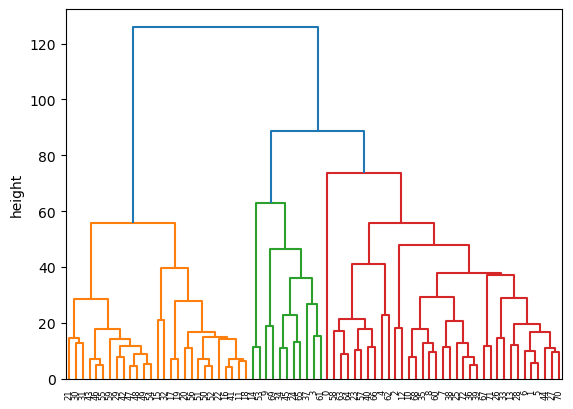

In [22]:
# plot dendrogram
dendrogram = sch.dendrogram(linkage_matrix)
plt.ylabel('height')
plt.savefig('dendrogram.png', dpi=300)


Technically we are done at this point. But if you are interested in using this for making predictions, you could use the `sklearn` implementation of agglomerative clustering:

In [23]:
cluster = AgglomerativeClustering(n_clusters=4, linkage='complete')
cluster_preds = cluster.fit_predict(flakes_df)
print(cluster_preds)


[3 2 2 0 2 2 2 2 2 0 2 1 2 2 0 1 1 1 1 1 1 1 1 2 0 2 2 2 2 1 1 1 1 2 0 2 2
 0 2 2 2 1 1 1 2 0 1 1 1 1 1 1 1 0 1 1 1 2 2 1 2 0 2 2 2 0 2 2 2 0 2 2 2]


- What is going on with this series of numbers? 
- These are labels (0,1,2,3) corresponding to the four clusters we asked for. 
- Each label represents a data point. 

## Latihan Clustering
- To practice more on clustering, obtain the [User Knowledge Modeling dataset](https://archive.ics.uci.edu/dataset/257/user+knowledge+modeling), which contains five numeric predictor attributes and one categorical target attribute, which is the class label. 
- Use both divisive and agglomerative clustering on this dataset and compare their accuracy in predicting the class label from the predictor attributes. 
- How many clusters do you create? Why? Explain the various design decisions you make.

<center>
        <h1>The End</h1>
</center>